
Alunos:
  * Arthur Breno dos Reis Paula - 12547382
  * Fernando - 8556609
  * Mateus Israel Silva - 11735042

# Desafio: **Porto Seguro's Safe Driver Prediction**

OBJETIVO:
 - Calcular a probabilidade de um seguro automotivo ser acionado

# Biliotecas importadas

In [14]:
## Bibliotecas básicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

## Imputção de dados
from sklearn.impute import KNNImputer

## Decomposição
from sklearn.decomposition import PCA

## Pre processamento
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Selecao de modelos
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

# Avaliar classificador
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
import xgboost as xgb


Configuração gráfica

In [2]:
%matplotlib inline

In [3]:
sns.set_style('darkgrid')

Importação dos dados

In [4]:
path_train = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/train_no_missing_scaled.csv'
path_test = '/Users/administrador/Documents/Pessoal/repositorios/data/kaggle_porto_seguro_driver/test.csv'

In [5]:
dados_brutos = pd.read_csv(path_train)
dados_brutos_teste = pd.read_csv(path_test)

---

# Modelos de Aprendizado de Máquina

## Divisão dos dados

In [6]:
dados_brutos.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0.050218,0.964585,0.213594,1.182227,-0.299997,-0.805893,1.700163,-0.442786,-0.476919,...,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,0,-0.453868,-0.540094,0.954362,-0.844892,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,0,1.562477,3.973944,1.695130,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,...,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,0,-0.957955,-0.540094,-0.897559,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,0,-0.957955,0.964585,-1.638327,1.182227,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,...,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537


In [7]:
X = dados_brutos.iloc[:, 1:]
y = dados_brutos.iloc[:, 0]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
Counter(y_train)

Counter({0: 401539, 1: 15109})

## Regressão Logística

In [25]:
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['saga'], 
        'C': [0.5, 1, 1.5, 2, 3], 
        'random_state': [42]
    }, 
    {
        'penalty': ['l2'], 
        'solver': ['lbfgs', 'saga', 'sag', 'newton-cholesky', 'newton-cg'], 
        'C': [0.5, 1, 1.5, 2, 3], 
        'random_state': [42]
    },
    {
        'penalty': ['elasticnet'], 
        'solver': ['saga'], 
        'C': [0.5, 1, 1.5, 2, 3]
    }    
]

In [22]:
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['saga'], 
        'C': [ 1, 1.5, 2, 3], 
        'random_state': [42],
        'max_iter': [300]
    },
]

In [23]:
estimator = LogisticRegression()
cv = 3

In [24]:
clf = GridSearchCV(estimator=estimator, param_grid=param_grid, scoring='f1', cv=cv, n_jobs=-1)

In [25]:
clf.fit(X_train, y_train)

/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/admin

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [1, 1.5, 2, 3], 'max_iter': [300],
                          'penalty': ['l1'], 'random_state': [42],
                          'solver': ['saga']}],
             scoring='f1')

In [ ]:
estimator.fit(X_train, y_train)

In [71]:
weights = np.ceil(dados_brutos.target.value_counts()/dados_brutos.target.value_counts().min()).to_dict()

In [9]:
clf = LogisticRegression(max_iter=500, n_jobs=4)

In [10]:
clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, n_jobs=4)

In [72]:
model = LogisticRegression(class_weight=weights)

model.fit(X_train, y_train)

/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 27.0, 1: 1.0})

Predição:

In [26]:
y_pred_prob = clf.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = clf.predict(X_test) # Previsão padrão em classes

In [117]:
gini_normalized(y_test, y_pred_prob)

np.float64(0.006087380512900098)

In [27]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    171979
           1       0.00      0.00      0.00      6585

    accuracy                           0.96    178564
   macro avg       0.48      0.50      0.49    178564
weighted avg       0.93      0.96      0.95    178564



/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0

In [75]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.05, 1, 6),
    cv=5,
    scoring=make_scorer(gini_normalized, needs_proba=True)
)

/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/metrics/_scorer.py:610: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(
/Users/administrador/Documents/Pessoal/repositorios/environments/ds_challenges_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/administrador/Documents/

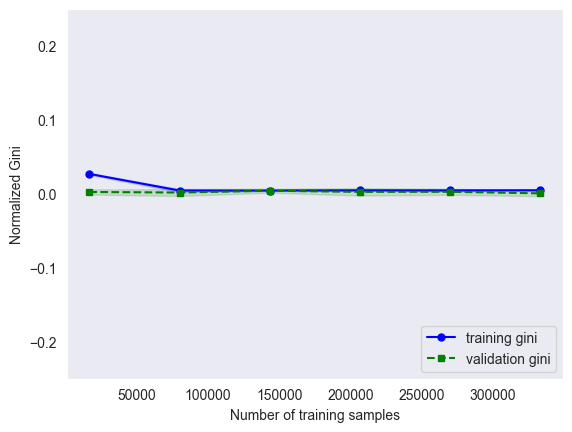

In [76]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, 
         color='blue', marker='o', 
         markersize=5, 
         label='training gini')
plt.fill_between(train_sizes, 
                 train_mean + train_std,
                 train_mean - train_std, 
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation gini')
plt.fill_between(train_sizes, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Normalized Gini')
plt.legend(loc='lower right')
plt.ylim([-0.25, 0.25])
plt.show()

In [46]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8467
AUC: 0.5001


## Random Forest

In [77]:
weights

{0: 27.0, 1: 1.0}

In [78]:
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=8, class_weight=weights)

model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 27.0, 1: 1.0}, n_jobs=8,
                       random_state=42)

In [79]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [80]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8467
AUC: 0.4985


In [81]:
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    151187
           1       0.20      0.00      0.00     27377

    accuracy                           0.85    178564
   macro avg       0.52      0.50      0.46    178564
weighted avg       0.75      0.85      0.78    178564



## Gradient Boosting Classifier

In [63]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [64]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [65]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.8578
AUC: 0.9311


## KNN

In [66]:
model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

In [68]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

Acurácia: 0.7017
AUC: 0.7451


## SVM

In [69]:
model = SVC(kernel='linear')

model.fit(X_train, y_train)

SVC(kernel='linear')

In [70]:
y_pred_prob = model.predict_proba(X_test)[:, 1] # Probabilidade de ser 1

y_pred_class = model.predict(X_test) # Previsão padrão em classes

AttributeError: This 'SVC' has no attribute 'predict_proba'

In [ ]:
accuracy = accuracy_score(y_test, y_pred_class)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Acurácia: {accuracy:.4f}')
print(f'AUC: {roc_auc:.4f}')

## XGBOOST

In [101]:
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from collections import Counter

In [105]:
counter = Counter(y_train)
estimate = counter[0]/counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.522


In [106]:
model = XGBClassifier(scale_pos_weight=5)

In [107]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)


In [108]:
# summarize performance
print('Mean ROC AUC: %.5f' % np.mean(scores))

Mean ROC AUC: 0.49837
